In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("titanic.csv")

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

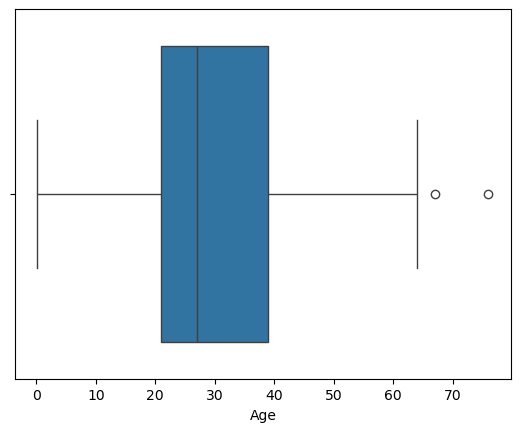

In [11]:
sns.boxplot(x=df["Age"])

In [13]:
#Finding the IQR

percentile25 = df['Age'].quantile (0.25)

percentile75 = df['Age'].quantile(0.75)

In [15]:
percentile25

21.0

In [17]:
percentile75

39.0

In [19]:
IQR=percentile75-percentile25

In [21]:
upper_limit=percentile75+1.5*IQR
upper_limit

66.0

In [23]:
lower_limit=percentile25-1.5*IQR
lower_limit

-6.0

In [25]:
df[df["Age"] < lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [29]:
newdf=df[df["Age"] < upper_limit]

In [31]:
newdf.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


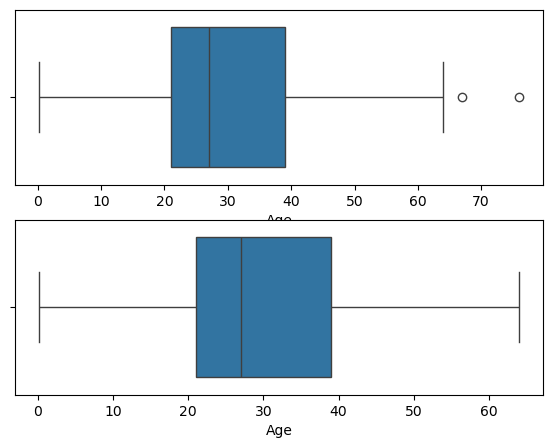

In [33]:
plt.figure(figsize = (15,5))

plt.subplot(222)

sns.boxplot(x = df['Age'])

plt.subplot(224)

sns.boxplot(x = newdf['Age'])

plt.show()

In [35]:
new_df_cap=df.copy()

In [39]:
new_df_cap['Age'] = np.where(
    new_df_cap['Age'] > upper_limit,
    upper_limit,

    np.where(
    new_df_cap['Age'] < lower_limit,
    lower_limit,
    new_df_cap["Age"])

)

In [41]:
new_df_cap.shape

(418, 12)

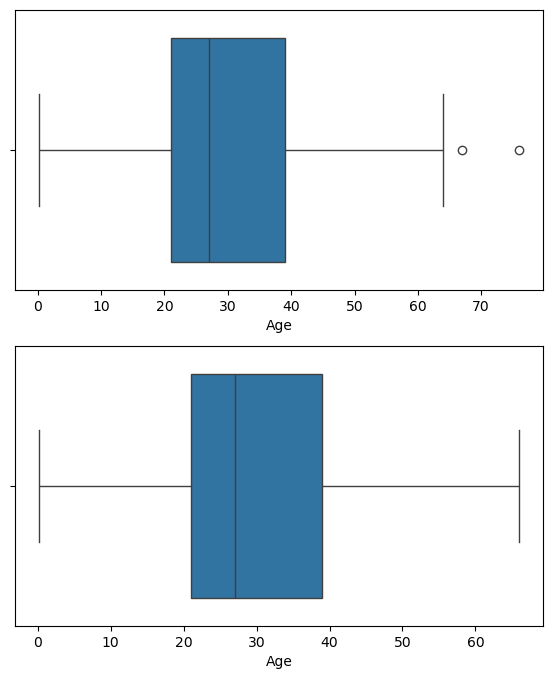

In [43]:
plt.figure(figsize = (15,8))

plt.subplot(222)

sns.boxplot(x=df ['Age'])

plt.subplot(224)

sns.boxplot(x=new_df_cap['Age'])

plt.show()